# Ejercicio 1 
### Acerca de la compañía
La empresa Dream Housing Finance se ocupa de todos los préstamos hipotecarios. Tienen presencia en todas las zonas urbanas, semiurbanas y rurales. El cliente primero solicita un préstamo hipotecario después de que esa compañía valide la elegibilidad del cliente para el préstamo.

### Problema
La compañía desea automatizar el proceso de elegibilidad del préstamo (en tiempo real) según los detalles del cliente proporcionados al completar el formulario de solicitud en línea con 12 campos de información. 

Para el desarrollo de esta tarea se ha proporcionado una base con 614 clientes etiquetados con el estatus del crédito y otra adicional con 367 sin etiquetar como validación. A continuación se muestra un detalle de los atributos que tiene.

|Variable|Description|Tipo|Posibles valores|
|--------|-----------|-----|---------------|
|Loan_ID|Loan ID|object|Unique LP000000|
|Gender|Male/ Female|object|{Male,Female}|
|Married|Applicant married|object|{YES,NO,}|
|Dependents|Number of dependents|object|{0,1,2, 3+}|
|Education|Applicant Education|object|{Graduate,UnderGraduate}|
|Self_Employed|Self employed (Y/N)|object|{YES,NO,}|
|ApplicantIncome|Applicant income|int64|Numeric|
|CoapplicantIncome|Coapplicant income|float64|Numeric|
|LoanAmount|Loan amount in thousands|float64|Numeric|
|Loan_Amount_Term|Term of loan in months|float64|Numeric|
|Credit_History|credit history meets guidelines|float64|Numeric|
|Property_Area|Tipo de area  |object|{ Urban, Semi Urban,Rural}|
|Loan_Status|Loan approved |object|{YES,NO,}|

Para automatizar este proceso, han planteado un problema para identificar los segmentos de clientes, que son elegibles para el monto del préstamo para que puedan dirigirse específicamente a estos clientes.


# Modulos necesarios para el analisis requerido

In [155]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
os.chdir('C:\\Users\\lgiov\\OneDrive\\Documents\\Diplomado citi\\python\\Pracctica 1')
test=pd.read_csv("test.csv")
train=pd.read_csv("train.csv")

# Informacion general train

In [57]:
print("Train contine "+str(train.shape[1])+" atributos y "+str(train.shape[0])+" registros")

train contine 13 atributos y 614 registros


In [58]:
print("Primeros 5 registros")
train.head(5)

Primeros 5 registros


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [59]:
print("Informacion general")
train.info()

Informacion general
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


### Numero de datos faltantes por atributo

In [62]:
def num_nulos(x):
  return x.isnull().sum()

print(train.apply(num_nulos, axis=0))



Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
134


In [65]:
print("Clientes con algun dato faltante:"+str(sum(train.apply(num_nulos, axis=1)>0)))

Clientes con algun dato faltante:134


In [69]:
train_clean = train.dropna(how='any',axis=0)
train_clean.shape

(480, 13)

In [93]:
variables=['Gender','Married','Education','Self_Employed','Loan_Status']

dummies = pd.get_dummies(train_clean['Gender']).rename(columns=lambda x: 'Category_' + str(x))

NameError: name 'Female' is not defined

In [107]:
train_clean['Gender'].value_counts()

Male      394
Female     86
Name: Gender, dtype: int64

In [108]:
train_clean['Married'].value_counts()

Yes    311
No     169
Name: Married, dtype: int64

In [109]:
train_clean['Education'].value_counts()

Graduate        383
Not Graduate     97
Name: Education, dtype: int64

In [110]:
train_clean['Self_Employed'].value_counts()

No     414
Yes     66
Name: Self_Employed, dtype: int64

In [111]:
train_clean['Loan_Status'].value_counts()

Y    332
N    148
Name: Loan_Status, dtype: int64

## Analisis por historial crediticio

In [121]:
pd.crosstab(train_clean["Credit_History"],train_clean["Loan_Status"],margins=True)

Loan_Status,N,Y,All
Married,,,
No,64,105,169
Yes,84,227,311
All,148,332,480


In [123]:
pd.crosstab(train_clean["Credit_History"],train_clean["Loan_Status"],margins=True,normalize='index')

Loan_Status,N,Y
Credit_History,,
0.0,0.900000,0.100000
1.0,0.207317,0.792683
All,0.308333,0.691667


Podemos observar que claramente tener un historial crediticio previo beneficia mucho la probabilidad de aceptacion del credito, esto nos ayudara a generar la segmentacion que se desea otener.

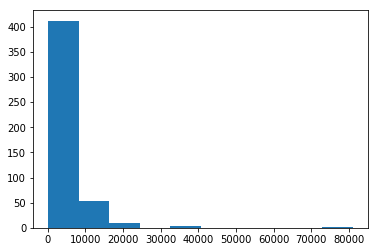

In [133]:
plt.hist(train_clean["ApplicantIncome"])
plt.show()

Al quitar los outlier podemos apreciar mejor la distribucion del ingreso.

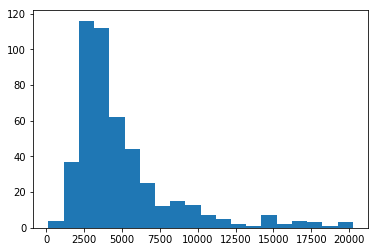

In [136]:
plt.hist(train_clean["ApplicantIncome"][train_clean["ApplicantIncome"] <train_clean["ApplicantIncome"].quantile(0.99)],bins=20)
plt.show()

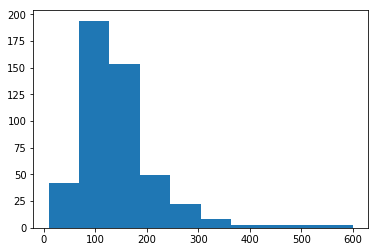

In [137]:
plt.hist(train_clean["LoanAmount"])
plt.show()


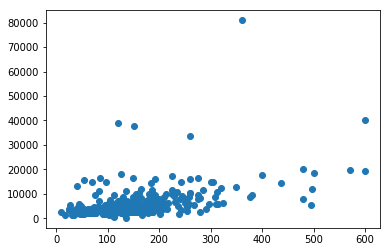

In [157]:
train_loand=train_clean[train_clean.Loan_Status=='N']

plt.scatter(train_clean.LoanAmount,train_clean.ApplicantIncome)
plt.show()

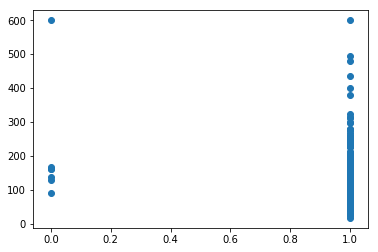

In [160]:
train_loand=train_clean[train_clean.Loan_Status=='Y']
plt.scatter(train_loand.Credit_History,train_loand.LoanAmount)
plt.show()

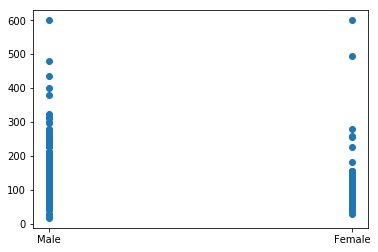

In [166]:
train_loan=train_clean[train_clean.Loan_Status=='Y']
plt.scatter(train_loand.Gender,train_loand.LoanAmount)
plt.show()


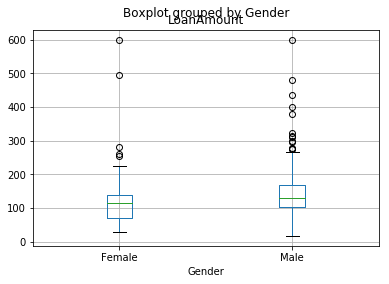

In [168]:
train_loan.boxplot(column='LoanAmount',by='Gender')

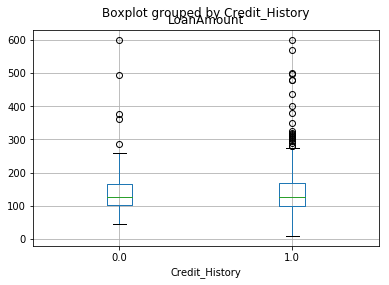

In [172]:
train_clean.boxplot(column='LoanAmount',by='Credit_History')

Por distribucion podemos observar que el monto solicitado es muy parecido, aunque existen bastantes outliers para los que ya tienen un prestamo